# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator   to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Steps to build the model

    1. Preprocessing the Data
    2. Derive New Features 
    3. Exploratory Data Analysis
    4. Train and Test Data
    5. Interpretable Model - Without PCA
    6. High Performance Model - With PCA
        a. Hyperparameter Tuning
        b. Class Imbalance
        c. Model Evaluation 

# Step 1: Preprocessing the Data

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the telephone churn csv
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# shape of dataset
telecom.shape

(99999, 226)

In [4]:
# info of dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom.select_dtypes(object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [6]:
# Converting all the date columns from object to datemonth format
d_cols=telecom.select_dtypes(object)
for i in d_cols:
    telecom[i] = pd.to_datetime(telecom[i], format='%m/%d/%Y')

telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [7]:
# describing the columns
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [8]:
# checking for missing values in Date columns
d_cols.isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [9]:
# dropping all the date columns
telecom=telecom.drop(d_cols, axis=1)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [10]:
# checking row wise missing values in dataset
telecom.isnull().sum(axis=1)

0         96
1         18
2         27
3         36
4         27
        ... 
99994     36
99995     36
99996    114
99997      0
99998    114
Length: 99999, dtype: int64

In [11]:
# removing row wise missing values in dataset more than 70 %
telecom=telecom[telecom.isnull().sum(axis=1)<149]
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [12]:
# shape of the dataset after removing 70% missing value rows
telecom.shape

(99432, 214)

In [13]:
# checking the null value percentage in each column
null_data = pd.DataFrame(round(telecom.isnull().sum()/len(telecom),2)*100, columns= ['Percentage of missing data'])

null_data[null_data['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
count_rech_3g_6,75.0
total_rech_data_6,75.0
arpu_2g_6,75.0
arpu_3g_6,75.0
max_rech_data_6,75.0
...,...
spl_og_mou_7,3.0
spl_og_mou_6,3.0
isd_og_mou_7,3.0
isd_og_mou_6,3.0


#### Since there are few columns with amount or data or average, so we will replace Nan values with '0' as the value maybe zero.

In [14]:
# creating a list for missing columns data
m_cols=list(null_data[null_data['Percentage of missing data']>0].index)
m_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std

In [15]:
# considering only numerical columns in the dataset
num_cols=m_cols[m_cols.index('total_rech_data_6'):m_cols.index('night_pck_user_6')]
num_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [16]:
# replacing all Nan's with 0.0
for i in num_cols:
    telecom[i]=telecom[i].replace(np.nan,0.0)

In [17]:
# checking for null value percentage again
null_data = pd.DataFrame(round(telecom.isnull().sum()/len(telecom),2)*100, columns= ['Percentage of missing data'])

null_data[null_data['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
fb_user_6,75.0
night_pck_user_6,75.0
fb_user_9,74.0
fb_user_8,74.0
fb_user_7,74.0
...,...
std_ic_t2t_mou_7,3.0
loc_og_mou_6,3.0
std_og_mou_6,3.0
std_ic_t2m_mou_7,3.0


#### Removing the columns with more than 45% of missing value data

In [18]:
# storing the variables having 45% of missing data into a list
n_cols=list(null_data[null_data['Percentage of missing data']>45].index)
len(n_cols)

8

In [19]:
# removing those columns from dataset
telecom.drop(n_cols, axis=1, inplace=True)

In [20]:
# checking for null value percentage again
null_data = pd.DataFrame(round(telecom.isnull().sum()/len(telecom),2)*100, columns= ['Percentage of missing data'])

null_data[null_data['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
ic_others_9,7.0
og_others_9,7.0
loc_ic_mou_9,7.0
loc_ic_t2f_mou_9,7.0
loc_og_t2f_mou_9,7.0
...,...
loc_ic_t2f_mou_7,3.0
loc_og_t2f_mou_7,3.0
loc_ic_mou_6,3.0
std_og_t2c_mou_6,3.0


In [21]:
nm_cols=list(null_data[null_data['Percentage of missing data']>0].index)
nm_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std

In [22]:
len(nm_cols)

116

In [23]:
for i in nm_cols:
    telecom[i]=telecom[i].replace(np.nan, telecom[i].median())

In [24]:
# checking for null value percentage again
null_data = pd.DataFrame(round(telecom.isnull().sum()/len(telecom),2)*100, columns= ['Percentage of missing data'])

null_data[null_data['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data


In [25]:
# checking the shape of the dataset after treatment of missing values
telecom.shape

(99432, 206)

# Step 2: Deriving New Features

In [26]:
# finding out the average of june and july total recharge amount columns
telecom['avg_rech_amt_J_Ju']=((telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_J_Ju
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,...,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,0,0,0,1006,0.0,0.0,0.00,0.00,229.0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,0,0,0,1103,0.0,0.0,4.17,0.00,241.5
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,0,0,0,2491,0.0,0.0,0.00,0.00,270.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0,0,0,1526,0.0,0.0,0.00,0.00,273.0


In [27]:
# filtering the High value customers
perc_6_7=telecom['avg_rech_amt_J_Ju'].quantile(0.70)
HVC=telecom[telecom['avg_rech_amt_J_Ju']>=perc_6_7]
HVC

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_J_Ju
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,7000519799,109,0.0,0.0,0.0,292.930,641.110,303.172,132.145,18.43,...,0,0,0,0,464,0.00,0.00,0.00,0.0,536.0
99970,7001386760,109,0.0,0.0,0.0,261.269,410.614,290.851,330.963,5.01,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,392.0
99974,7001453306,109,0.0,0.0,0.0,414.303,321.093,371.016,306.689,17.56,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,465.0
99986,7001729035,109,0.0,0.0,0.0,644.973,455.228,564.334,267.451,806.73,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,848.5


In [28]:
# Rewritng the original dataset with HVC
telecom=HVC
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_J_Ju
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [29]:
# Finding out the shape of dataset after HVC filtering
telecom.shape

(29885, 207)

### Creating Target Variable Churn Column

In [30]:
# Creating the target variable column
telecom['churn']=0
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_J_Ju,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [31]:
# Creating the list of columns in the new dataset
list(telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [32]:
# Applying the condition for churn column with sept column
telecom.loc[(telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) 
            & (telecom['vol_3g_mb_9']==0), 'churn']=1
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_J_Ju,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [33]:
# checking the value counts of churn column
telecom['churn'].value_counts()

0    27320
1     2565
Name: churn, dtype: int64

In [34]:
# checking the churn rate
churn=(sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

8.582901120963694

In [35]:
# dropping all the sept columns in the dataset
telecom.drop(['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9',
              'loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9',
              'std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9',
              'loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
              'std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9',
              'total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9',
              'count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','monthly_2g_9',
              'sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g'], axis=1, inplace=True)


In [36]:
# checking the head of dataset after dropping the sept columns
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,408.0,0


In [37]:
# shape of the dataset after dropping the columns
telecom.shape

(29885, 158)

### Deriving New Variables

In [38]:
telecom['Au_Ju_vbc_avg']=((telecom['aug_vbc_3g']+telecom['jul_vbc_3g'])/2)
telecom['Ju_J_vbc_avg']=((telecom['jul_vbc_3g']+telecom['jun_vbc_3g'])/2)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn,Au_Ju_vbc_avg,Ju_J_vbc_avg
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,802,57.74,19.38,18.74,1185.0,1,38.560,19.060
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,0,0,315,21.03,910.65,122.16,519.0,0,465.840,516.405
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0,0,2607,0.00,0.00,0.00,380.0,0,0.000,0.000
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,0,0,511,0.00,2.45,21.89,459.0,0,1.225,12.170
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0,0,667,0.00,0.00,0.00,408.0,0,0.000,0.000


# Step 3: Exploratory Data Analysis

In [39]:
numerical_cols=telecom.describe()
numerical_cols

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn,Au_Ju_vbc_avg,Ju_J_vbc_avg
count,2.988500e+04,29885.0,29793.0,29793.0,29793.0,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,...,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000,29885.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.865875,590.358854,535.873209,297.192190,305.421060,...,0.150510,0.140539,1263.764665,129.595331,135.357383,121.471776,697.807847,0.085829,132.476357,128.414580
std,6.848019e+05,0.0,0.0,0.0,0.0,442.427345,463.357858,492.845035,461.272347,482.258766,...,0.971089,0.975742,975.089795,390.892037,408.586546,390.083166,489.350361,0.280116,369.728479,366.590856
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,370.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.818000,366.286000,290.690000,41.340000,41.210000,...,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,451.000000,0.000000,0.000000,0.000000
50%,7.001232e+09,109.0,0.0,0.0,0.0,496.388000,494.713000,452.935000,126.190000,125.910000,...,0.000000,0.000000,913.000000,0.000000,0.000000,0.000000,570.000000,0.000000,0.000000,0.000000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.552000,701.936000,672.107000,354.590000,361.130000,...,0.000000,0.000000,1923.000000,1.600000,2.060000,0.000000,796.500000,0.000000,31.810000,25.540000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,37762.500000,1.000000,9844.470000,8190.585000


In [40]:
# dropping the columns with mean and all values 0.0
telecom.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], axis=1, inplace=True)
telecom.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn,Au_Ju_vbc_avg,Ju_J_vbc_avg
7,7000701601,109,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,0,0,802,57.74,19.38,18.74,1185.0,1,38.560,19.060
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,0,0,315,21.03,910.65,122.16,519.0,0,465.840,516.405
13,7002191713,109,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,...,0,0,2607,0.00,0.00,0.00,380.0,0,0.000,0.000
16,7000875565,109,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,0,0,511,0.00,2.45,21.89,459.0,0,1.225,12.170
17,7000187447,109,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,...,0,0,667,0.00,0.00,0.00,408.0,0,0.000,0.000


In [41]:
# checking the numerical columns again
numerical_cols=list(telecom.describe().columns)
numerical_cols

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og

#### As we are not be able to show all 160 columns plots so we are selecting some columns randomly and showing them

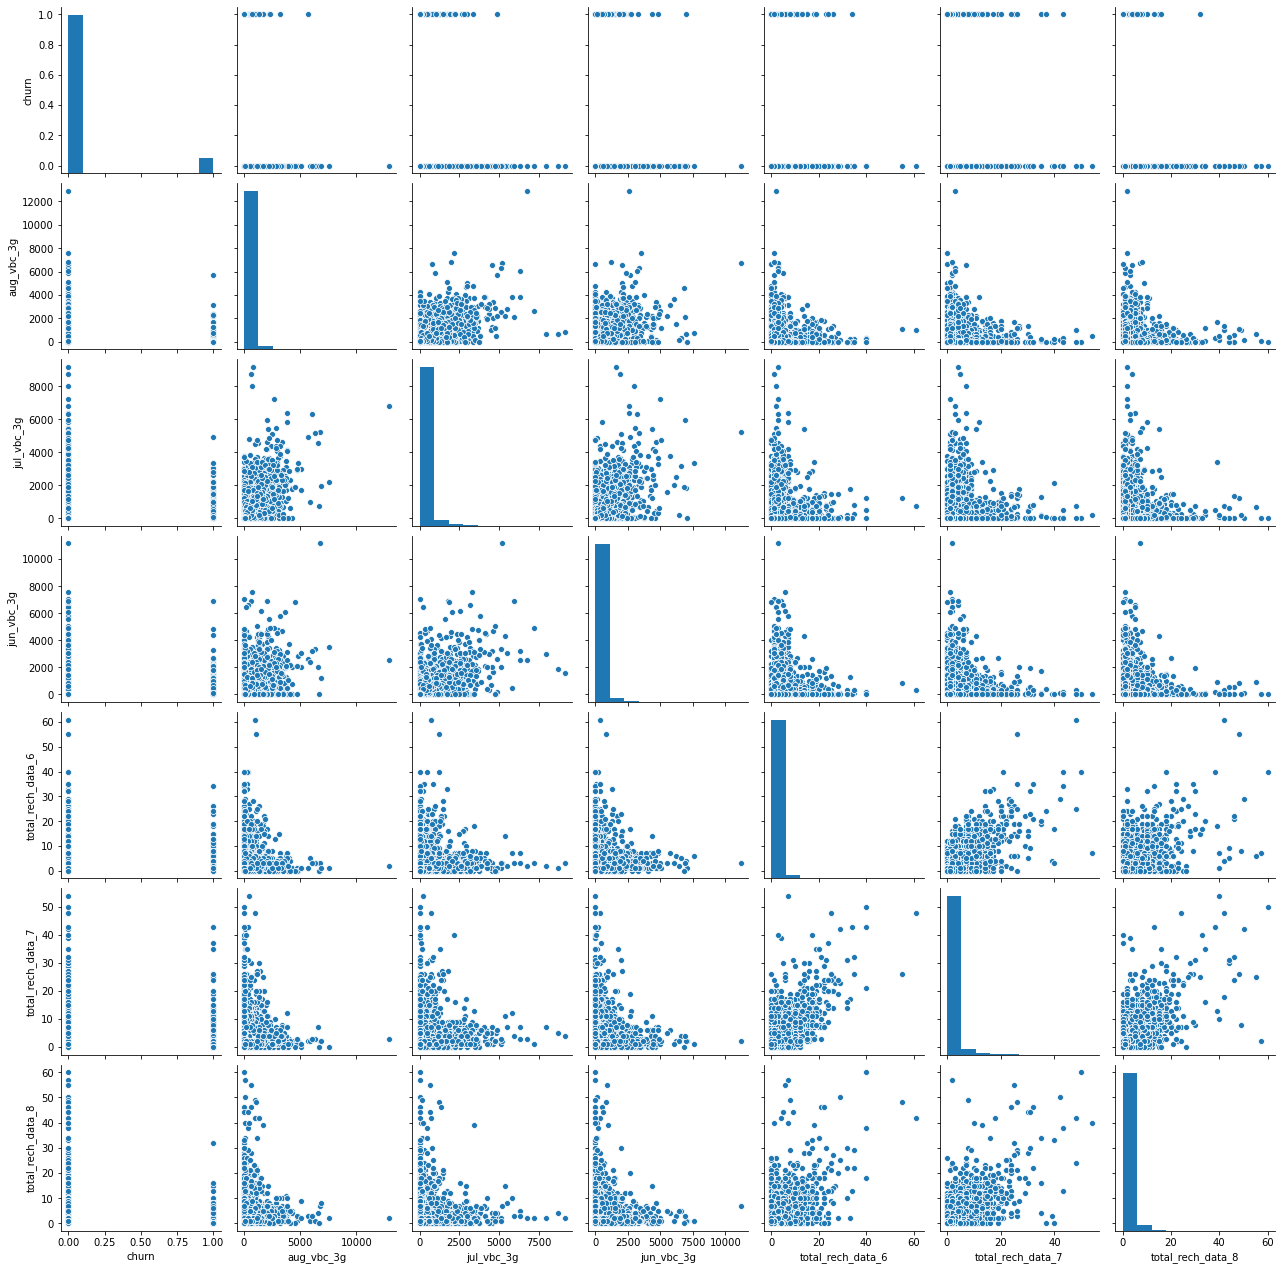

In [42]:
# pair plot for selected columns
p_cols=['churn','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','total_rech_data_6','total_rech_data_7','total_rech_data_8']
sns.pairplot(telecom[p_cols])
plt.show();

In [43]:
# correlation matrix for selected columns
telecom[p_cols].corr()

,churn,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_6,total_rech_data_7,total_rech_data_8
churn,1.000000,-0.076007,-0.047982,-0.032377,-0.023286,-0.041784,-0.095397
aug_vbc_3g,-0.076007,1.000000,0.710827,0.595891,0.178618,0.184012,0.198386
jul_vbc_3g,-0.047982,0.710827,1.000000,0.685292,0.208509,0.219119,0.167401
jun_vbc_3g,-0.032377,0.595891,0.685292,1.000000,0.230853,0.171843,0.145045
total_rech_data_6,-0.023286,0.178618,0.208509,0.230853,1.000000,0.723487,0.593457
total_rech_data_7,-0.041784,0.184012,0.219119,0.171843,0.723487,1.000000,0.689797
total_rech_data_8,-0.095397,0.198386,0.167401,0.145045,0.593457,0.689797,1.000000


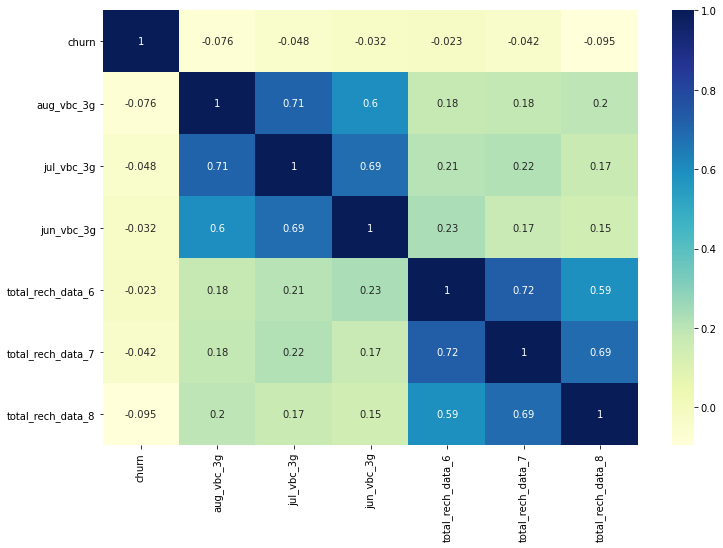

In [44]:
# heatmap for correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(telecom[p_cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

### Outlier Analysis

In [45]:
# Selecting 18 columns randomly before outlier analysis
ou_cols=['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','total_rech_data_6','total_rech_data_7','total_rech_data_8','arpu_6',
         'arpu_7','arpu_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
         'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',]

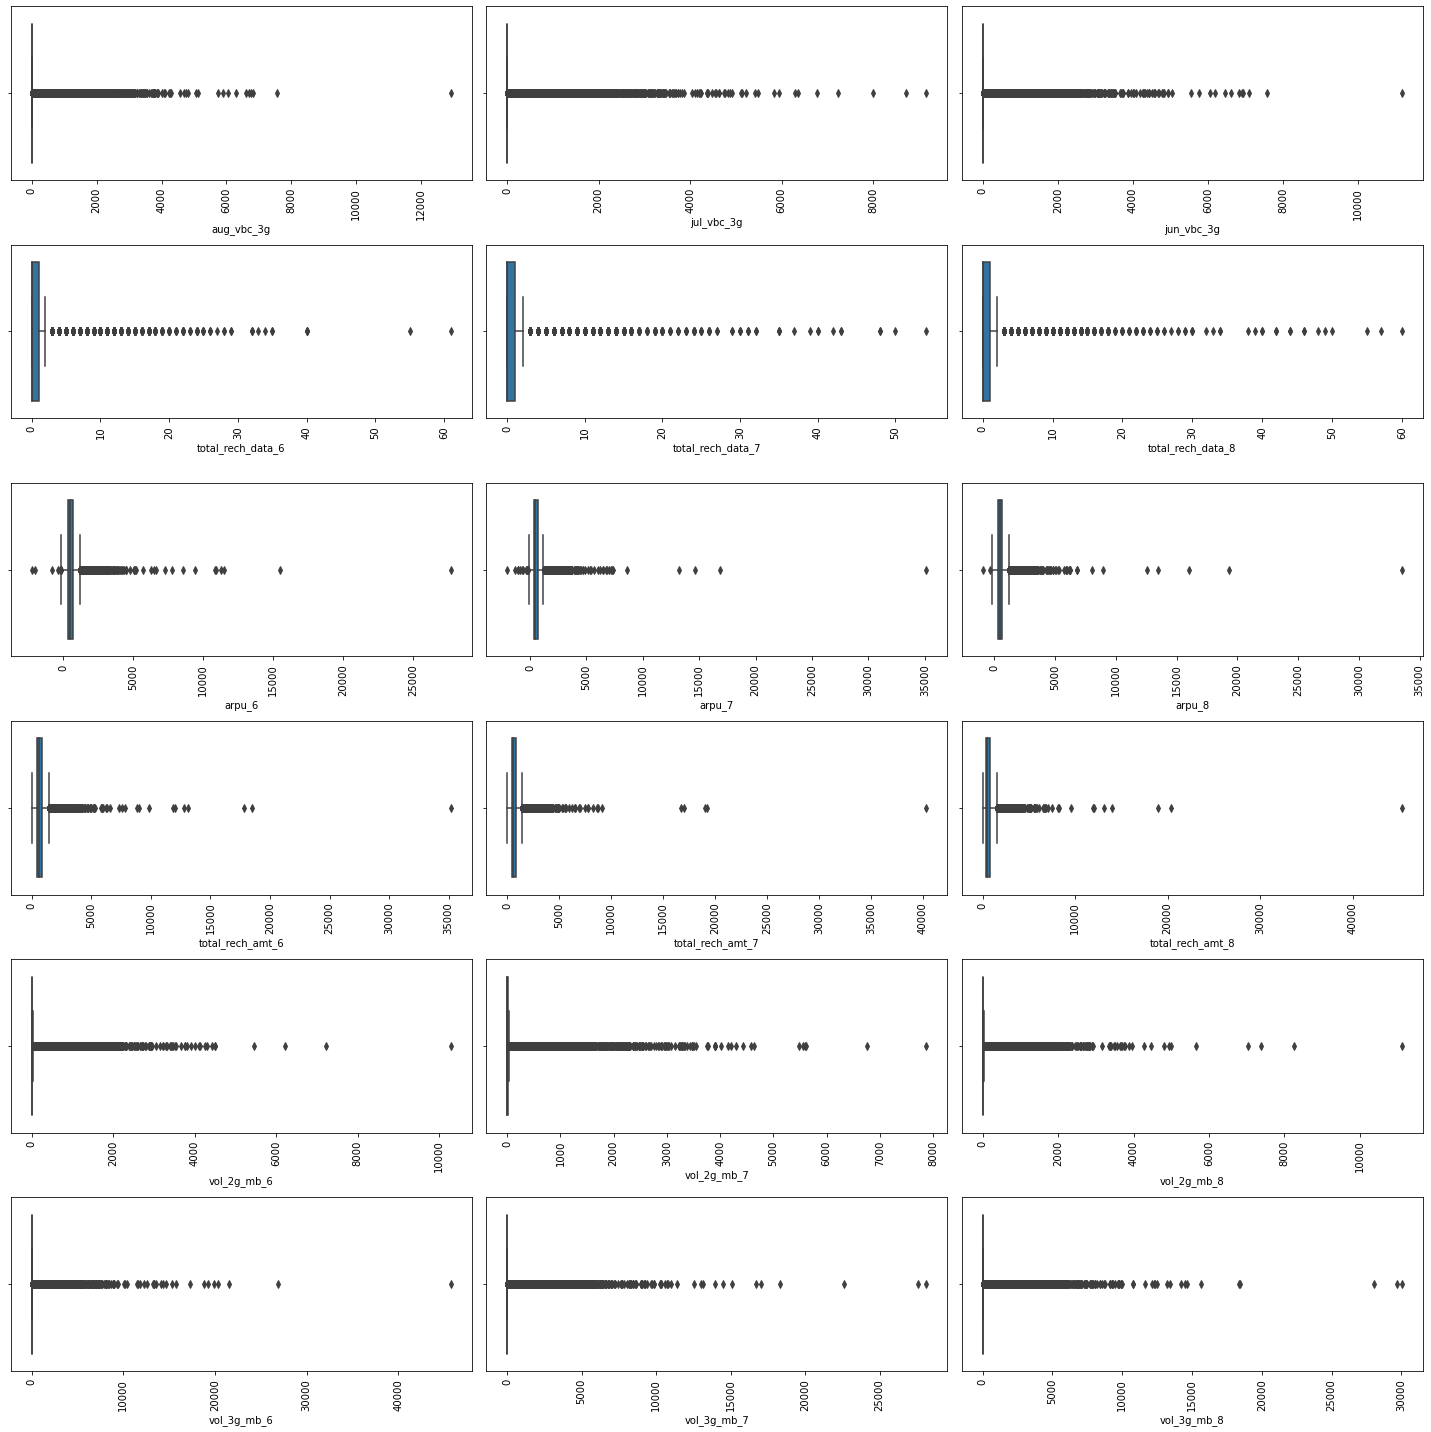

In [46]:
# Box Plot before Outlier Analysis
plt.figure(figsize=[20,20])
for cols in enumerate(ou_cols):
    plt.subplot(6,3, cols[0]+1)
    sns.boxplot(telecom[cols[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### As we need more outliers for churning we will perform soft capping on all the columns in the dataset

In [47]:
# Soft Capping for all the columns
for col in ou_cols:    
    Q1 = telecom[col].quantile(0.01)
    Q3 = telecom[col].quantile(0.99)
    IQR = Q3-Q1
    telecom = telecom[(telecom[col] >= (Q1-1.5*IQR))&(telecom[col] <= (Q3 + 1.5*IQR))]

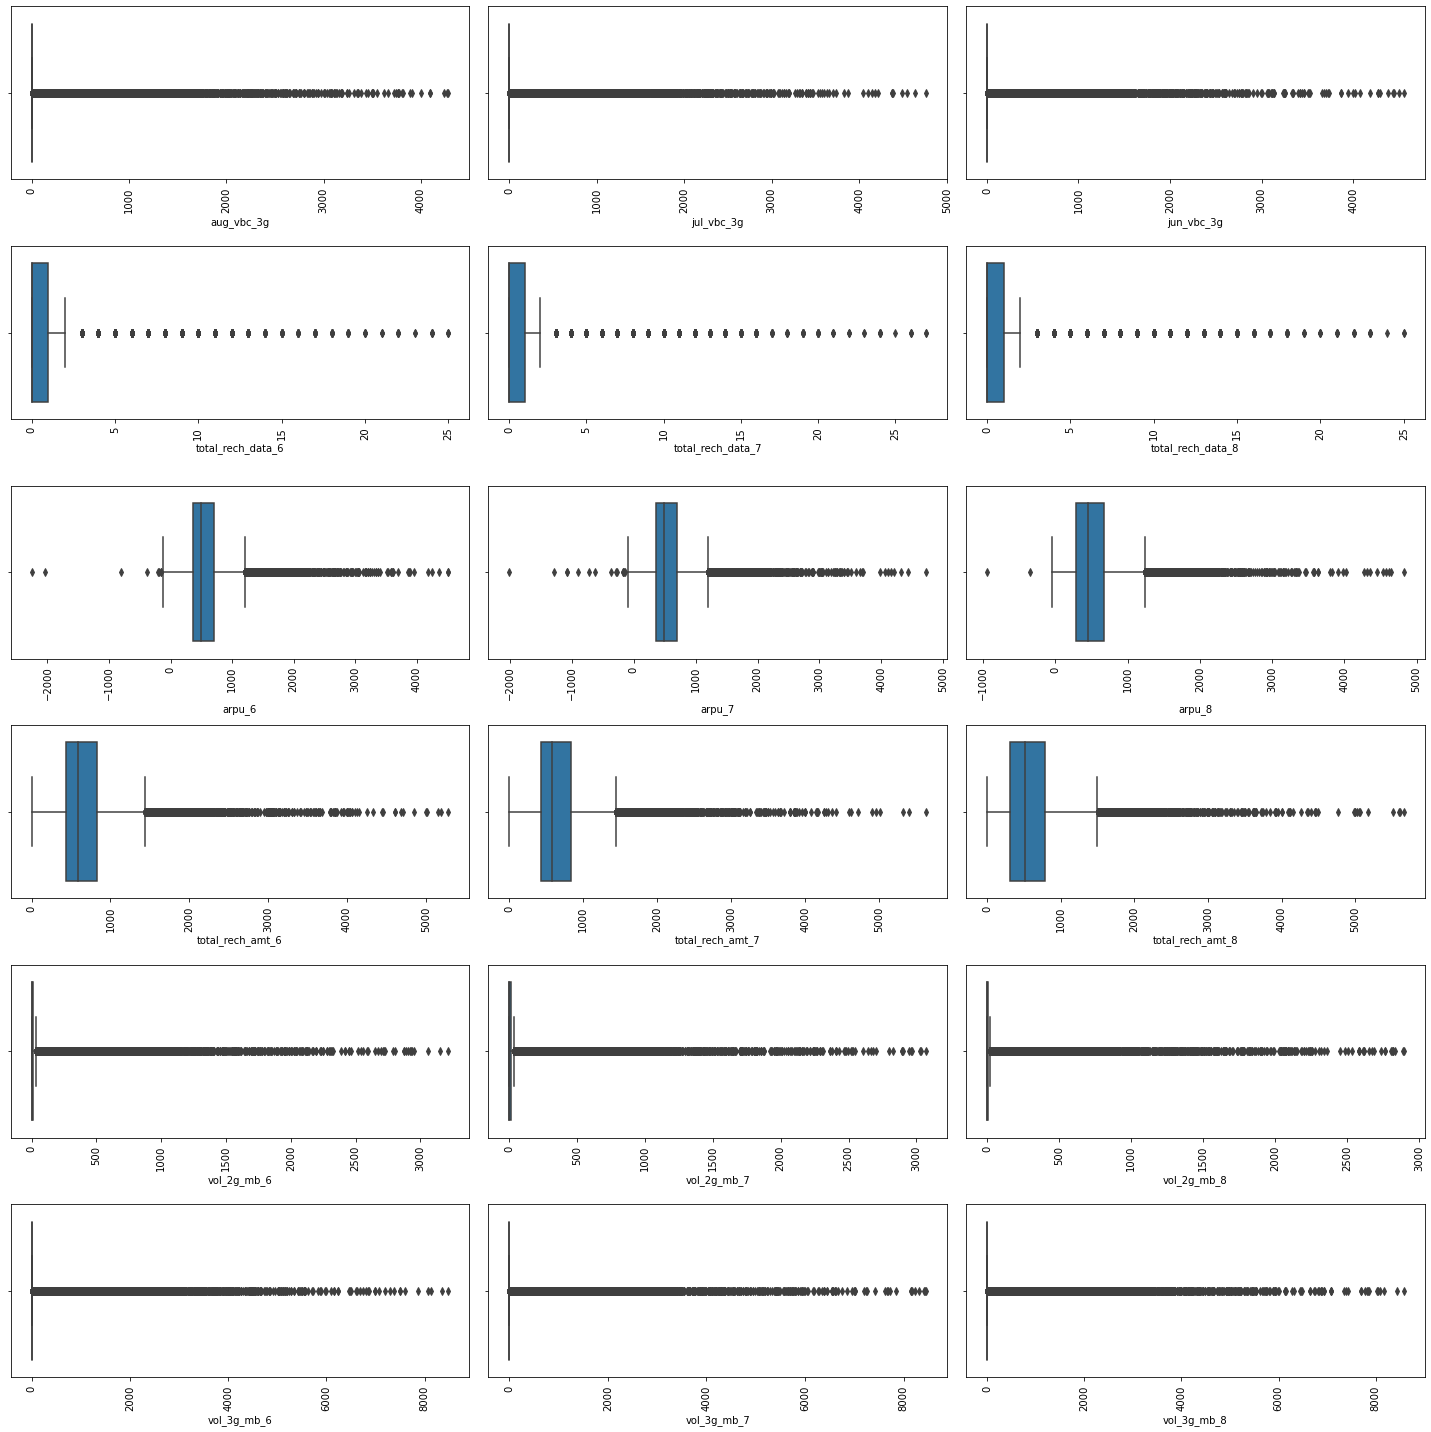

In [48]:
# Box Plot after Outlier Analysis
plt.figure(figsize=[20,20])
for cols in enumerate(ou_cols):
    plt.subplot(6,3, cols[0]+1)
    sns.boxplot(telecom[cols[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [49]:
# checking the dataset after outlier analysis
telecom.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn,Au_Ju_vbc_avg,Ju_J_vbc_avg
7,7000701601,109,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,...,0,0,802,57.74,19.38,18.74,1185.0,1,38.560,19.060
8,7001524846,109,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,...,0,0,315,21.03,910.65,122.16,519.0,0,465.840,516.405
13,7002191713,109,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,...,0,0,2607,0.00,0.00,0.00,380.0,0,0.000,0.000
16,7000875565,109,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,...,0,0,511,0.00,2.45,21.89,459.0,0,1.225,12.170
17,7000187447,109,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,...,0,0,667,0.00,0.00,0.00,408.0,0,0.000,0.000


In [50]:
# shape of the dataset
telecom.shape

(29659, 157)

In [51]:
telecom.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,churn,Au_Ju_vbc_avg,Ju_J_vbc_avg
count,2.965900e+04,29659.0,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,...,29659.00000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000,29659.000000
mean,7.001223e+09,109.0,579.032220,580.267966,526.145026,298.184442,306.394990,269.676915,420.326340,425.927318,...,0.12873,0.117671,1265.991369,123.296914,128.182214,113.999668,686.568731,0.085876,125.739564,121.090941
std,6.846103e+05,0.0,356.717549,356.432848,390.862804,461.388847,482.976776,466.289427,467.629041,481.519000,...,0.75130,0.712908,975.835632,352.605266,367.928610,342.995938,365.125899,0.280186,333.885511,327.810785
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,180.000000,0.000000,0.000000,0.000000,370.000000,0.000000,0.000000,0.000000
25%,7.000642e+09,109.0,364.483000,365.466000,289.958500,41.885000,41.630000,32.360000,138.910000,137.240000,...,0.00000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,0.000000
50%,7.001233e+09,109.0,495.260000,493.216000,451.706000,126.940000,126.610000,100.480000,283.960000,283.740000,...,0.00000,0.000000,918.000000,0.000000,0.000000,0.000000,568.000000,0.000000,0.000000,0.000000
75%,7.001815e+09,109.0,701.410500,698.239500,668.719000,355.870000,362.460000,300.010000,525.170000,534.480000,...,0.00000,0.000000,1931.000000,0.700000,0.920000,0.000000,793.000000,0.000000,28.882500,22.337500
max,7.002411e+09,109.0,4513.603000,4723.647000,4822.844000,7376.710000,8157.780000,10752.560000,8362.360000,8316.360000,...,24.00000,21.000000,4321.000000,4282.150000,4764.630000,4552.540000,4835.500000,1.000000,3977.180000,4324.305000


# Step 4: Train Test Data

In [52]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
X=telecom.drop(['churn','circle_id','mobile_number'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,Au_Ju_vbc_avg,Ju_J_vbc_avg
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,802,57.74,19.38,18.74,1185.0,38.560,19.060
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,315,21.03,910.65,122.16,519.0,465.840,516.405
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,0,2607,0.00,0.00,0.00,380.0,0.000,0.000
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,0,511,0.00,2.45,21.89,459.0,1.225,12.170
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,0,667,0.00,0.00,0.00,408.0,0.000,0.000


In [54]:
y=telecom['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [55]:
# creating the test train split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [56]:
print("X train Shape : ", X_train.shape)
print("y train Shape : ", y_train.shape)
print("X test Shape : ", X_test.shape)
print("y test Shape : ", y_test.shape)

X train Shape :  (20761, 154)
y train Shape :  (20761,)
X test Shape :  (8898, 154)
y test Shape :  (8898,)


In [57]:
# Scaling the model
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.47160529, -0.17040045, -0.28012415, ..., -0.50507386,
        -0.37470117, -0.37035387],
       [ 0.22666239, -0.10398549, -0.05972598, ..., -0.0693481 ,
         2.0916325 ,  2.69931702],
       [-0.62988425,  0.68242218,  0.43614399, ...,  0.03131007,
         1.6094417 ,  0.88423006],
       ...,
       [ 0.03722299, -1.02106142, -0.38553276, ..., -0.86220352,
        -0.37470117, -0.37035387],
       [-0.63357669,  1.89596455, -0.88828142, ...,  0.70282414,
        -0.37470117, -0.37035387],
       [ 0.26849209, -0.23360951, -0.51486783, ..., -0.12036662,
        -0.37470117, -0.37035387]])

In [58]:
X_train=pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,Au_Ju_vbc_avg,Ju_J_vbc_avg
0,-0.471605,-0.170400,-0.280124,-0.585053,-0.314182,-0.478526,-0.809989,-0.731910,-0.659808,-0.219967,...,-0.172677,-0.174672,-0.165527,0.070747,-0.348486,-0.348529,-0.333291,-0.505074,-0.374701,-0.370354
1,0.226662,-0.103985,-0.059726,-0.464750,-0.469006,-0.431237,-0.114735,-0.483342,-0.249590,-0.219967,...,-0.172677,-0.174672,-0.165527,-0.941139,1.173366,2.682478,2.273828,-0.069348,2.091633,2.699317
2,-0.629884,0.682422,0.436144,-0.630735,-0.624690,-0.522310,-0.662813,-0.517315,-0.390780,-0.219967,...,-0.172677,-0.174672,1.245772,-0.949341,2.284496,0.745072,0.890827,0.031310,1.609442,0.884230
3,-0.921516,2.083827,2.891293,-0.631086,4.019402,5.838382,-0.198705,-0.103857,-0.494303,0.124604,...,-0.172677,-0.174672,-0.165527,-0.695088,-0.348486,-0.348529,-0.333291,0.650427,-0.374701,-0.370354
4,-0.524745,-0.265078,-0.430932,0.862515,1.676953,0.569912,-0.876959,-0.885566,-0.574779,-0.219967,...,-0.172677,-0.174672,-0.165527,-0.830416,-0.348486,-0.348529,-0.333291,-0.425099,-0.374701,-0.370354


In [59]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.4990499 ,  1.63622112, -0.08121187, ...,  1.3026365 ,
        -0.37470117, -0.37035387],
       [ 1.2600182 ,  0.86769787, -0.0305945 , ...,  1.11510896,
         1.76726789,  3.77468991],
       [ 0.40325335,  0.45533738,  0.92185266, ...,  0.45738368,
        -0.37470117, -0.37035387],
       ...,
       [-0.32011045, -0.56943066,  1.06001475, ..., -0.35891268,
        -0.37470117, -0.37035387],
       [ 0.5387004 , -1.10439256, -0.48210917, ..., -0.56574453,
        -0.37470117, -0.37035387],
       [ 0.07168198, -0.3578941 , -0.15510801, ..., -0.05555931,
        -0.37470117, -0.37035387]])

In [60]:
X_test=pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_J_Ju,Au_Ju_vbc_avg,Ju_J_vbc_avg
0,0.499050,1.636221,-0.081212,-0.435261,-0.237777,-0.424335,2.318386,4.236159,1.657052,-0.219967,...,-0.172677,-0.174672,-0.165527,-0.725844,-0.348486,-0.348529,-0.333291,1.302637,-0.374701,-0.370354
1,1.260018,0.867698,-0.030594,-0.020682,-0.201905,-0.004830,-0.762734,-0.734358,-0.477166,-0.219967,...,1.260156,-0.174672,1.245772,-0.130195,1.223253,2.045147,5.043148,1.115109,1.767268,3.774690
2,0.403253,0.455337,0.921853,1.426908,1.948084,2.800034,-0.100837,0.061263,0.320378,-0.219967,...,-0.172677,-0.174672,-0.165527,-0.506449,-0.348486,-0.348529,-0.333291,0.457384,-0.374701,-0.370354
3,0.453213,-0.936689,-0.172770,2.796366,0.469279,1.496099,-0.687039,-0.832367,-0.637484,-0.219967,...,-0.172677,-0.174672,-0.165527,-0.895005,-0.348486,-0.348529,-0.333291,-0.278938,-0.374701,-0.370354
4,1.510985,0.270850,0.472893,0.164567,0.507062,0.063208,0.578722,-0.078837,0.404378,-0.219967,...,-0.172677,-0.174672,-0.165527,1.451710,-0.348486,-0.348529,-0.333291,1.029618,-0.374701,-0.370354


# Step 5: Interpretable Model - Without Principal Component Analysis (PCA)

### Using Logistic Regression for Interpretable Model

In [61]:
# importing required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score

In [62]:
# Feature Selection using RFE
logreg=LogisticRegression()
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [63]:
rfe.support_

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 35),
 ('arpu_7', False, 86),
 ('arpu_8', False, 60),
 ('onnet_mou_6', False, 73),
 ('onnet_mou_7', False, 21),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 75),
 ('offnet_mou_7', False, 100),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 77),
 ('roam_ic_mou_7', False, 94),
 ('roam_ic_mou_8', False, 115),
 ('roam_og_mou_6', False, 76),
 ('roam_og_mou_7', False, 30),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 34),
 ('loc_og_t2t_mou_7', False, 45),
 ('loc_og_t2t_mou_8', False, 26),
 ('loc_og_t2m_mou_6', False, 22),
 ('loc_og_t2m_mou_7', False, 84),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 126),
 ('loc_og_t2f_mou_7', False, 57),
 ('loc_og_t2f_mou_8', False, 28),
 ('loc_og_t2c_mou_6', False, 78),
 ('loc_og_t2c_mou_7', False, 80),
 ('loc_og_t2c_mou_8', False, 105),
 ('loc_og_mou_6', False, 71),
 ('loc_og_mou_7', False, 107),
 ('loc_og_mou_8', False, 27),
 ('std_og_t2t_mou_6', False, 117),
 ('std_og_t2t_mou_7', False, 54),


In [65]:
col=X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_J_Ju', 'Au_Ju_vbc_avg',
       'Ju_J_vbc_avg'],
      dtype='object', length=139)

In [66]:
# Assesing the model after RFE
X_train_sm=sm.add_constant(X_train[col])
y_train_sm=np.array(y_train)
lr=sm.GLM(y_train_sm,X_train_sm,family=sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20761
Model:                            GLM   Df Residuals:                    20745
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3996.0
Date:                Tue, 01 Jun 2021   Deviance:                       7992.0
Time:                        08:42:24   Pearson chi2:                 2.30e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0839      0.075    -54.415      0.000      -4.231      -3.937
onnet_mou_8            0.5663      0.098      5.774      0.000       0.374       0.759
offnet_mou_8           0.6702      0.093      7.230      0.000       0.489       0.852
loc_og_t2m_mou_8      -0.6655      0.114     -5.851      0.000      -0.888      -0.443
total_og_mou_8        -1.3554      0.137     -9.896      0.000      -1.624      -1.087
loc_ic_mou_7           0.7570      0.072     10.477      0.000       0.615       0.899
loc_ic_mou_8           6.8229      0.374     18.228      0.000       6.089       7.557
std_ic_t2t_mou_8       0.6838      0.475      1.440      0.150      -0.247       1.614
std_ic_t2m_mou_8       0.9974      0.723      1.380      0.167      -0.419       2.414
std_ic_mou_8           2.6256      0.923      2.846      0.004       0.818       4.434
total_ic_mou_8       -10.9356      0.437    -25.043      0.000     -11.791     -10.080
spl_ic_mou_8          -0.5076      0.078     -6.487      0.000      -0.661      -0.354
isd_ic_mou_8           2.1644      0.108     19.976      0.000       1.952       2.377
last_day_rch_amt_8    -0.5573      0.061     -9.079      0.000      -0.678      -0.437
total_rech_data_8     -0.5888      0.068     -8.679      0.000      -0.722      -0.456
monthly_3g_8          -0.4785      0.076     -6.268      0.000      -0.628      -0.329
======================================================================================
"""

In [67]:
# removing columns with high p-value
X_train_sm=X_train_sm.drop('std_ic_t2m_mou_8',axis=1)

In [68]:
lr2=sm.GLM(y_train_sm,X_train_sm,family=sm.families.Binomial())
lr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20761
Model:                            GLM   Df Residuals:                    20746
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3997.3
Date:                Tue, 01 Jun 2021   Deviance:                       7994.6
Time:                        08:42:25   Pearson chi2:                 2.41e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0801      0.075    -54.479      0.000      -4.227      -3.933
onnet_mou_8            0.5681      0.098      5.794      0.000       0.376       0.760
offnet_mou_8           0.6727      0.093      7.259      0.000       0.491       0.854
loc_og_t2m_mou_8      -0.6686      0.114     -5.876      0.000      -0.892      -0.446
total_og_mou_8        -1.3528      0.137     -9.881      0.000      -1.621      -1.084
loc_ic_mou_7           0.7580      0.072     10.481      0.000       0.616       0.900
loc_ic_mou_8           6.7208      0.367     18.317      0.000       6.002       7.440
std_ic_t2t_mou_8       0.0493      0.100      0.491      0.623      -0.147       0.246
std_ic_mou_8           3.8560      0.198     19.468      0.000       3.468       4.244
total_ic_mou_8       -10.8334      0.430    -25.182      0.000     -11.677      -9.990
spl_ic_mou_8          -0.5058      0.078     -6.468      0.000      -0.659      -0.353
isd_ic_mou_8           2.1420      0.108     19.900      0.000       1.931       2.353
last_day_rch_amt_8    -0.5606      0.061     -9.141      0.000      -0.681      -0.440
total_rech_data_8     -0.5881      0.068     -8.668      0.000      -0.721      -0.455
monthly_3g_8          -0.4790      0.076     -6.276      0.000      -0.629      -0.329
======================================================================================
"""

In [69]:
# dropping loc_og_mou_8 column
X_train_sm=X_train_sm.drop('std_ic_t2t_mou_8',axis=1)

In [70]:
lr3=sm.GLM(y_train_sm,X_train_sm,family=sm.families.Binomial())
lr3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20761
Model:                            GLM   Df Residuals:                    20747
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3997.4
Date:                Tue, 01 Jun 2021   Deviance:                       7994.8
Time:                        08:42:25   Pearson chi2:                 2.44e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0803      0.075    -54.478      0.000      -4.227      -3.934
onnet_mou_8            0.5722      0.098      5.857      0.000       0.381       0.764
offnet_mou_8           0.6707      0.093      7.245      0.000       0.489       0.852
loc_og_t2m_mou_8      -0.6677      0.114     -5.868      0.000      -0.891      -0.445
total_og_mou_8        -1.3538      0.137     -9.889      0.000      -1.622      -1.086
loc_ic_mou_7           0.7580      0.072     10.481      0.000       0.616       0.900
loc_ic_mou_8           6.7157      0.367     18.310      0.000       5.997       7.435
std_ic_mou_8           3.8874      0.186     20.933      0.000       3.523       4.251
total_ic_mou_8       -10.8295      0.430    -25.176      0.000     -11.673      -9.986
spl_ic_mou_8          -0.5060      0.078     -6.470      0.000      -0.659      -0.353
isd_ic_mou_8           2.1410      0.108     19.890      0.000       1.930       2.352
last_day_rch_amt_8    -0.5607      0.061     -9.142      0.000      -0.681      -0.440
total_rech_data_8     -0.5883      0.068     -8.670      0.000      -0.721      -0.455
monthly_3g_8          -0.4788      0.076     -6.274      0.000      -0.628      -0.329
======================================================================================
"""

In [71]:
# checking vif as p-values are less than 0.05 
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,total_ic_mou_8,360.29
6,loc_ic_mou_8,267.38
7,std_ic_mou_8,53.88
4,total_og_mou_8,47.19
1,onnet_mou_8,22.90
2,offnet_mou_8,21.86
10,isd_ic_mou_8,16.25
5,loc_ic_mou_7,3.30
3,loc_og_t2m_mou_8,1.61
13,monthly_3g_8,1.12


In [72]:
# removing loc_ic_mou_8 column as it has high vif
X_train_sm=X_train_sm.drop('total_ic_mou_8',axis=1)

In [73]:
# checking vif again 
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,total_og_mou_8,45.83
1,onnet_mou_8,22.39
2,offnet_mou_8,21.37
6,loc_ic_mou_8,3.56
5,loc_ic_mou_7,3.30
3,loc_og_t2m_mou_8,1.61
12,monthly_3g_8,1.11
10,last_day_rch_amt_8,1.09
11,total_rech_data_8,1.07
7,std_ic_mou_8,1.03


In [74]:
# removing total_og_mou_8 column as it has high vif
X_train_sm=X_train_sm.drop('total_og_mou_8',axis=1)

In [75]:
# checking vif again 
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,loc_ic_mou_8,3.54
4,loc_ic_mou_7,3.29
3,loc_og_t2m_mou_8,1.60
2,offnet_mou_8,1.34
11,monthly_3g_8,1.11
9,last_day_rch_amt_8,1.09
10,total_rech_data_8,1.07
6,std_ic_mou_8,1.03
1,onnet_mou_8,1.02
7,spl_ic_mou_8,1.02


#### as both p values and vif are less we can proceed for final model 

In [76]:
lr4=sm.GLM(y_train_sm,X_train_sm,family=sm.families.Binomial())
final_model=lr4.fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20761
Model:                            GLM   Df Residuals:                    20749
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4550.6
Date:                Tue, 01 Jun 2021   Deviance:                       9101.1
Time:                        08:42:26   Pearson chi2:                 1.40e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9744      0.068    -58.628      0.000      -4.107      -3.842
onnet_mou_8           -0.5341      0.049    -10.895      0.000      -0.630      -0.438
offnet_mou_8          -0.2989      0.046     -6.522      0.000      -0.389      -0.209
loc_og_t2m_mou_8      -0.9879      0.109     -9.034      0.000      -1.202      -0.774
loc_ic_mou_7           0.4706      0.060      7.819      0.000       0.353       0.589
loc_ic_mou_8          -1.7804      0.132    -13.451      0.000      -2.040      -1.521
std_ic_mou_8          -0.4950      0.092     -5.409      0.000      -0.674      -0.316
spl_ic_mou_8          -0.6487      0.082     -7.901      0.000      -0.810      -0.488
isd_ic_mou_8          -0.2045      0.091     -2.255      0.024      -0.382      -0.027
last_day_rch_amt_8    -0.8169      0.065    -12.541      0.000      -0.945      -0.689
total_rech_data_8     -0.8132      0.072    -11.261      0.000      -0.955      -0.672
monthly_3g_8          -0.2986      0.069     -4.305      0.000      -0.435      -0.163
======================================================================================
"""

In [77]:
# Coefficients of each variable
coefficients = pd.DataFrame(abs(final_model.params), columns=['Coefficient'])
coefficients

,Coefficient
const,3.974386
onnet_mou_8,0.534084
offnet_mou_8,0.298896
loc_og_t2m_mou_8,0.987925
loc_ic_mou_7,0.470616
loc_ic_mou_8,1.780419
std_ic_mou_8,0.495029
spl_ic_mou_8,0.648740
isd_ic_mou_8,0.204523
last_day_rch_amt_8,0.816906


In [78]:
# Sorting coefficients from highest to lowest
coefficients = coefficients.sort_values(by ='Coefficient', ascending=False)
coefficients

,Coefficient
const,3.974386
loc_ic_mou_8,1.780419
loc_og_t2m_mou_8,0.987925
last_day_rch_amt_8,0.816906
total_rech_data_8,0.813185
spl_ic_mou_8,0.648740
onnet_mou_8,0.534084
std_ic_mou_8,0.495029
loc_ic_mou_7,0.470616
offnet_mou_8,0.298896


loc_ic_mou_8, loc_og_t2m_mou_8 and last_day_rch_amt_8 are the top 3 churn predicters

In [79]:
# Final columns remaining in X_train
print(X_train_sm.columns)
len(X_train_sm.columns)

Index(['const', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'monthly_3g_8'],
      dtype='object')


12

In [80]:
y_train_pred=final_model.predict(X_train_sm)
y_train_pred[:10]

0    0.145371
1    0.000479
2    0.006626
3    0.003749
4    0.081705
5    0.000099
6    0.015395
7    0.002694
8    0.009489
9    0.014738
dtype: float64

In [81]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.45370928e-01, 4.79123246e-04, 6.62551166e-03, 3.74946732e-03,
       8.17053530e-02, 9.94722876e-05, 1.53952676e-02, 2.69436820e-03,
       9.48861672e-03, 1.47379611e-02])

In [82]:
y_train_pred_final=pd.DataFrame({'churn':y_train.values,'churn_prob':y_train_pred})
y_train_pred_final.index=y_train.index
y_train_pred_final.head(10)

,churn,churn_prob
3954,0,0.145371
39572,0,0.000479
2485,0,0.006626
90016,0,0.003749
17726,0,0.081705
74990,0,0.000099
92278,0,0.015395
65040,0,0.002694
76349,0,0.009489
2955,0,0.014738


In [83]:
# creating new column predicted with 1 if churn_prob>0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.churn_prob.map(lambda x:1 if x>0 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted
3954,0,0.145371,1
39572,0,0.000479,1
2485,0,0.006626,1
90016,0,0.003749,1
17726,0,0.081705,1


In [84]:
# confusion matrix
conf=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
print(conf)

[[    0 18962]
 [    0  1799]]


In [85]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted))

0.08665285872549491


In [86]:
# checking Accuracy again
print(metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted))

0.08665285872549491


### Plotting ROC curve

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

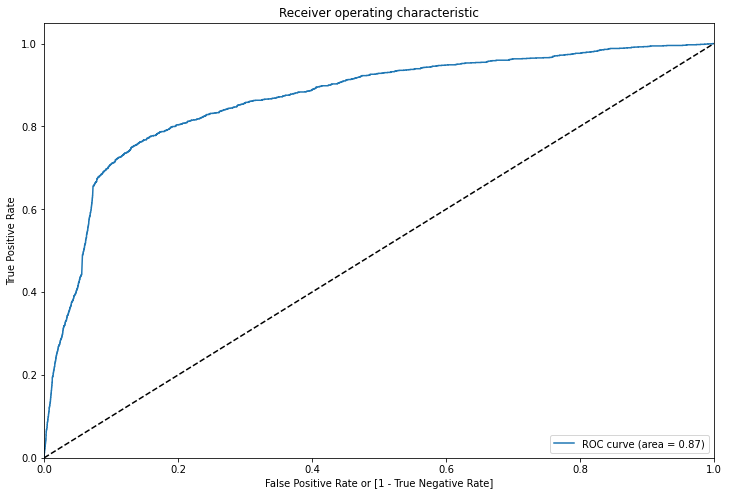

In [89]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

### Finding Optimal cut-off point

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3954,0,0.145371,1,1,1,0,0,0,0,0,0,0,0
39572,0,0.000479,1,1,0,0,0,0,0,0,0,0,0
2485,0,0.006626,1,1,0,0,0,0,0,0,0,0,0
90016,0,0.003749,1,1,0,0,0,0,0,0,0,0,0
17726,0,0.081705,1,1,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086653  1.000000  0.000000
0.1   0.1  0.770820  0.821012  0.766058
0.2   0.2  0.878137  0.719844  0.893155
0.3   0.3  0.905544  0.395220  0.953961
0.4   0.4  0.918019  0.250139  0.981384
0.5   0.5  0.914503  0.026681  0.998734
0.6   0.6  0.914118  0.010006  0.999895
0.7   0.7  0.913829  0.005559  1.000000
0.8   0.8  0.913684  0.003891  1.000000
0.9   0.9  0.913395  0.000556  1.000000


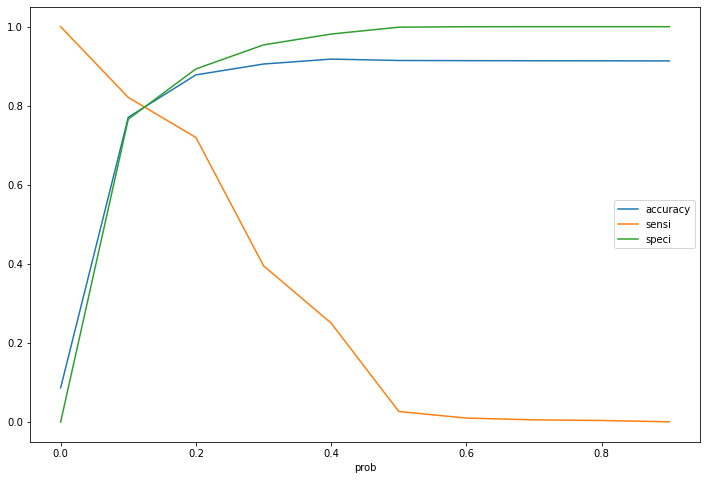

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot(x = 'prob', y = ['accuracy','sensi', 'speci'], figsize = [12,8])
plt.show()

#### As from the plot the optimal cut-off point is 0.1, we will take it as the cut-off probability

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3954,0,0.145371,1,1,1,0,0,0,0,0,0,0,0,1
39572,0,0.000479,1,1,0,0,0,0,0,0,0,0,0,0
2485,0,0.006626,1,1,0,0,0,0,0,0,0,0,0,0
90016,0,0.003749,1,1,0,0,0,0,0,0,0,0,0,0
17726,0,0.081705,1,1,0,0,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy after 0.1 cutoff
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7708202880400752

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[14526,  4436],
       [  322,  1477]], dtype=int64)

In [96]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.2497886013867749

In [97]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8210116731517509

In [98]:
cols=X_train_sm.columns[1:]
cols

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_3g_8'],
      dtype='object')

### Making Predictions on the test set

In [99]:
# adding constant
X_test_sm=sm.add_constant(X_test[cols])

In [100]:
# making predictions on test set
y_test_pred = final_model.predict(X_test_sm)
y_test_pred[:10]

0    0.113169
1    0.025408
2    0.021807
3    0.094158
4    0.026630
5    0.060073
6    0.019027
7    0.001382
8    0.028092
9    0.079394
dtype: float64

In [101]:
# Test data proabilites
y_test_pred_final = pd.DataFrame(y_test_pred, columns=['churn_prob'])
y_test_sm=np.array(y_test)
y_test_pred_final['churn'] = y_test_sm

In [102]:
# predictions based on optimal cut off
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map(lambda x: 1 if x > 0.1 else 0)

In [103]:
y_test_pred_final.head()

,churn_prob,churn,final_predicted
0,0.113169,1,1
1,0.025408,0,0
2,0.021807,0,0
3,0.094158,0,0
4,0.026630,0,0


In [104]:
# accuracy of test data
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.775118004045853

In [105]:
confusion3 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted)
confusion3

array([[6282, 1868],
       [ 133,  615]], dtype=int64)

In [106]:
# precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.24768425291985502

In [107]:
# recall
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8221925133689839

In [108]:
y_test_pred_final

,churn_prob,churn,final_predicted
0,0.113169,1,1
1,0.025408,0,0
2,0.021807,0,0
3,0.094158,0,0
4,0.026630,0,0
...,...,...,...
8893,0.420273,1,1
8894,0.267622,1,1
8895,0.001220,0,0
8896,0.010511,0,0


In [109]:
y_train_pred_final

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3954,0,0.145371,1,1,1,0,0,0,0,0,0,0,0,1
39572,0,0.000479,1,1,0,0,0,0,0,0,0,0,0,0
2485,0,0.006626,1,1,0,0,0,0,0,0,0,0,0,0
90016,0,0.003749,1,1,0,0,0,0,0,0,0,0,0,0
17726,0,0.081705,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40710,0,0.066820,1,1,0,0,0,0,0,0,0,0,0,0
82326,0,0.073788,1,1,0,0,0,0,0,0,0,0,0,0
47664,0,0.007174,1,1,0,0,0,0,0,0,0,0,0,0
78623,0,0.355914,1,1,1,1,1,0,0,0,0,0,0,1


In [110]:
y_train_pred_final[['churn','churn_prob', 'final_predicted']]

,churn,churn_prob,final_predicted
3954,0,0.145371,1
39572,0,0.000479,0
2485,0,0.006626,0
90016,0,0.003749,0
17726,0,0.081705,0
...,...,...,...
40710,0,0.066820,0
82326,0,0.073788,0
47664,0,0.007174,0
78623,0,0.355914,1


In [111]:
# number of churns in train data
y_train_pred_final.final_predicted.sum()

5913

In [112]:
# number of churns in test data
y_test_pred_final.final_predicted.sum()

2483

In [113]:
# churn rate in train data
y_train_pred_final.final_predicted.sum()/20761

0.28481287028563174

In [114]:
# churn rate in test data
y_test_pred_final.final_predicted.sum()/8898

0.279051472240953

# Step 6: High Performance Model - with Principal Component Analysis (PCA)

## Performing PCA

In [115]:
# importing required libraries
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [116]:
X_train.shape

(20761, 154)

In [117]:
# creating pca
pca=PCA(random_state=42)

In [118]:
# fitting pca on train data
pca.fit(X_train)

PCA(random_state=42)

In [119]:
# checking components
pca.components_

array([[ 5.51531470e-02,  6.43325451e-02,  6.97529744e-02, ...,
         6.60918500e-02,  1.70166259e-01,  1.68312540e-01],
       [ 1.57493576e-01,  1.80448293e-01,  1.75297605e-01, ...,
         1.95936714e-01, -1.15760307e-02, -1.57101796e-02],
       [ 8.33244266e-02,  1.14591152e-01,  9.05963592e-02, ...,
         1.13280121e-01,  3.52077275e-02,  3.47149786e-02],
       ...,
       [ 0.00000000e+00, -1.75256983e-16,  1.28858884e-16, ...,
        -4.88830034e-02, -1.85974723e-01,  3.83214856e-02],
       [-0.00000000e+00, -7.19457134e-17,  2.43883411e-16, ...,
         5.10980033e-03, -2.09961449e-01, -5.72228203e-02],
       [-0.00000000e+00, -1.62418070e-16,  1.38542568e-16, ...,
         2.73280482e-02, -1.22723152e-01, -5.77166534e-02]])

In [120]:
# variance ratio
pca.explained_variance_ratio_

array([1.20929081e-01, 8.56682092e-02, 7.01898390e-02, 5.01129633e-02,
       4.03051615e-02, 3.26689486e-02, 2.86650495e-02, 2.46324099e-02,
       2.37248064e-02, 2.29977048e-02, 2.25500140e-02, 1.98748017e-02,
       1.94649675e-02, 1.88105316e-02, 1.72464511e-02, 1.60379094e-02,
       1.58226177e-02, 1.53577388e-02, 1.50431565e-02, 1.36206936e-02,
       1.32042866e-02, 1.29198917e-02, 1.23182317e-02, 1.17315593e-02,
       1.08237915e-02, 9.61728843e-03, 9.34421621e-03, 8.85181957e-03,
       8.36817732e-03, 8.16875397e-03, 8.08755453e-03, 7.88930274e-03,
       7.75900194e-03, 7.01247323e-03, 6.61598153e-03, 6.43522928e-03,
       6.26383619e-03, 6.13344870e-03, 5.73582625e-03, 5.50236500e-03,
       5.35324841e-03, 5.18122061e-03, 5.14126342e-03, 5.02116773e-03,
       4.94617987e-03, 4.82204481e-03, 4.44463251e-03, 4.25605860e-03,
       4.02729530e-03, 3.96498325e-03, 3.89178929e-03, 3.80613239e-03,
       3.66328132e-03, 3.42061935e-03, 3.39455513e-03, 3.28994696e-03,
      

In [121]:
# calculating cumulative variables
var_cm=np.cumsum(pca.explained_variance_ratio_)
var_cm

array([0.12092908, 0.20659729, 0.27678713, 0.32690009, 0.36720525,
       0.3998742 , 0.42853925, 0.45317166, 0.47689647, 0.49989417,
       0.52244419, 0.54231899, 0.56178396, 0.58059449, 0.59784094,
       0.61387885, 0.62970147, 0.64505921, 0.66010236, 0.67372306,
       0.68692734, 0.69984723, 0.71216547, 0.72389702, 0.73472082,
       0.7443381 , 0.75368232, 0.76253414, 0.77090232, 0.77907107,
       0.78715863, 0.79504793, 0.80280693, 0.8098194 , 0.81643539,
       0.82287061, 0.82913445, 0.8352679 , 0.84100373, 0.84650609,
       0.85185934, 0.85704056, 0.86218182, 0.86720299, 0.87214917,
       0.87697122, 0.88141585, 0.88567191, 0.8896992 , 0.89366419,
       0.89755597, 0.90136211, 0.90502539, 0.90844601, 0.91184056,
       0.91513051, 0.91838273, 0.9215128 , 0.92456766, 0.92742282,
       0.93011936, 0.93271675, 0.93530294, 0.93785551, 0.940323  ,
       0.94269994, 0.94505507, 0.94739048, 0.94966977, 0.95189816,
       0.95408409, 0.9562676 , 0.95841178, 0.96044193, 0.96238

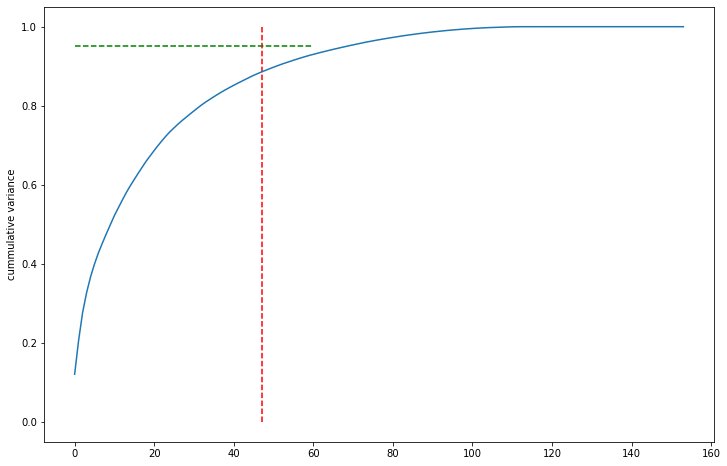

In [122]:
# plotting variable cumulative
fig=plt.figure(figsize=[12,8])
plt.vlines(x=47, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.95, xmax=60, xmin=0, colors='g',linestyles='--')
plt.plot(var_cm)
plt.ylabel('cummulative variance')
plt.show()

We can take upto 48 columns to get maximum variance in the data

In [123]:
# creating new pca with 48 columns
pca_fin=IncrementalPCA(n_components=48)

In [124]:
# final pca variable
X_train_pca=pca_fin.fit_transform(X_train)

In [125]:
X_train_pca.shape

(20761, 48)

In [126]:
# correlation matrix
cor_pca=np.corrcoef(X_train_pca.transpose())

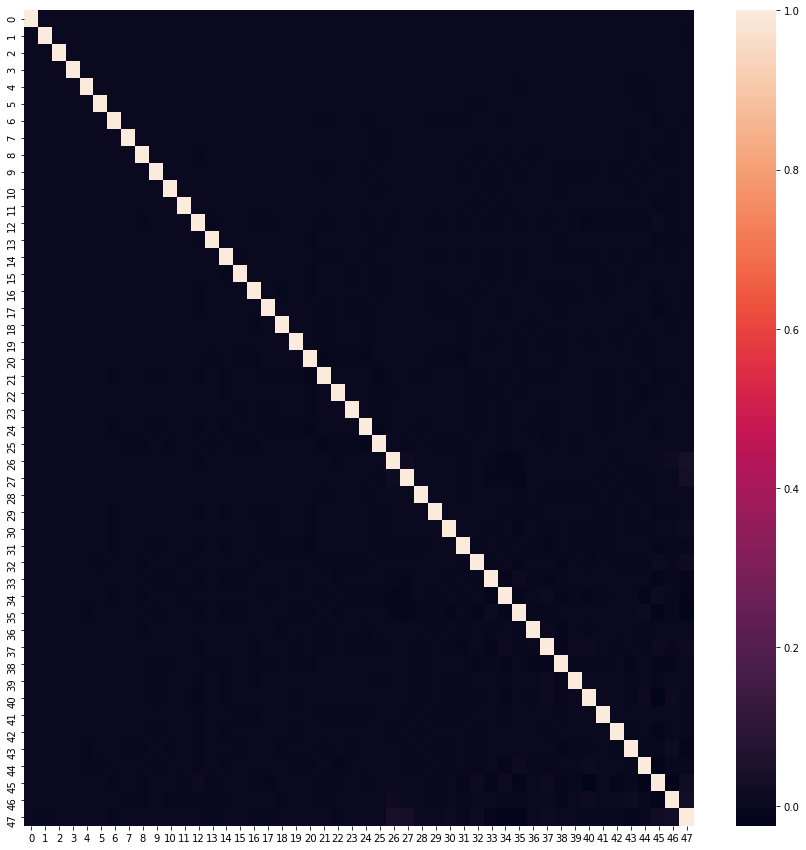

In [127]:
# plotting heatmap for above correlation
plt.figure(figsize=[15,15])
sns.heatmap(cor_pca)
plt.show()

In [128]:
X_test_pca=pca_fin.transform(X_test)
X_test_pca.shape

(8898, 48)

## Class Imbalance SMOTE analysis

In [129]:
from imblearn.over_sampling import SMOTE

In [130]:
oversample=SMOTE()
X_train_bal,y_train_bal=oversample.fit_resample(X_train_pca,y_train)

In [131]:
# checking shape
y_train_bal.shape

(37924,)

In [132]:
from collections import Counter

In [133]:
# checking count for 1 and 0 in churn
counter=Counter(y_train_bal)
print(counter)

Counter({0: 18962, 1: 18962})


## High Performance Models

## Gradient Descent Boosting

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
# parameter grid
param_grid={"learning_rate":[0.2,0.6,0.9], "subsample":[0.3,0.6,0.9]}

# gradient boost with base estimator
GBC=GradientBoostingClassifier(max_depth=2, n_estimators=200)

# run grid search
folds=3
gr_sr_GBC=GridSearchCV(GBC, cv=folds, param_grid=param_grid, scoring='roc_auc', return_train_score=True, verbose=1)
gr_sr_GBC.fit(X_train_bal,y_train_bal)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 12.4min finished


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [136]:
cv_results = pd.DataFrame(gr_sr_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.722097,0.284763,0.025593,7.071083e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.927033,0.930510,0.936342,0.931295,0.003840,7,0.945367,0.942054,0.940737,0.942720,0.001948
1,27.095653,0.031913,0.031244,1.140650e-06,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.929018,0.931478,0.935508,0.932002,0.002675,6,0.947445,0.944567,0.941546,0.944519,0.002408
2,41.558577,0.189277,0.020831,7.362605e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.928806,0.931237,0.937839,0.932627,0.003817,5,0.947298,0.944842,0.943467,0.945202,0.001585
3,13.317104,0.033051,0.031243,2.247832e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.920049,0.928561,0.933059,0.927223,0.005395,8,0.948633,0.947028,0.948463,0.948042,0.000720
4,27.149208,0.056843,0.026038,7.364853e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.929599,0.940902,0.943535,0.938012,0.006045,3,0.957608,0.963502,0.962074,0.961061,0.002510


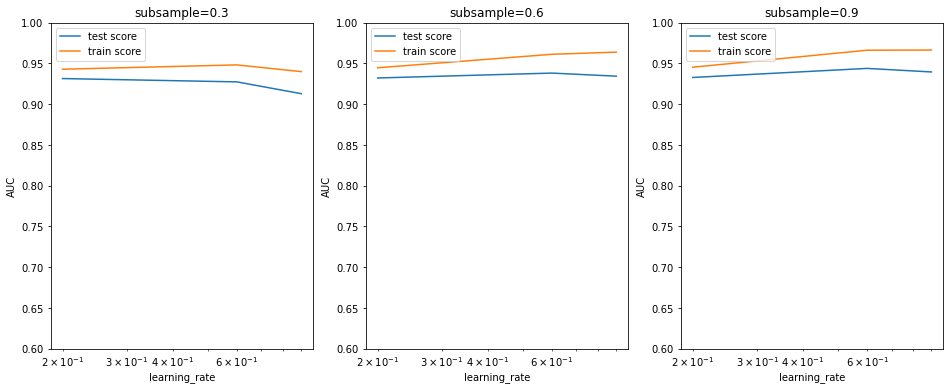

In [137]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


Sub sample=0.6 is the best fit for train and test

In [138]:
# Lets build a model with choosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model=GBC.fit(X_train_bal, y_train_bal)
model

GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [139]:
# predicting on test data
y_pred_gb = GBC.predict_proba(X_test_pca)
y_pred_gb[:10]

array([[0.24143802, 0.75856198],
       [0.79092882, 0.20907118],
       [0.820879  , 0.179121  ],
       [0.79150458, 0.20849542],
       [0.86262289, 0.13737711],
       [0.48555115, 0.51444885],
       [0.96663009, 0.03336991],
       [0.97455957, 0.02544043],
       [0.8723373 , 0.1276627 ],
       [0.86718162, 0.13281838]])

In [140]:
# accuracy score
roc = metrics.roc_auc_score(y_test, y_pred_gb[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 88.35%


## Adaptie Boosting

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],"n_estimators": [400, 600]}
tree = DecisionTreeClassifier(max_depth=2, random_state=100)

# adaboost with the tree as base estimator
# learning rate arbitrarily set to 0.01 
ABC = AdaBoostClassifier(base_estimator=tree,learning_rate=0.01,algorithm="SAMME")
folds = 3
gr_sr_ABC = GridSearchCV(ABC, cv = folds, param_grid=param_grid, scoring = 'roc_auc', return_train_score=True, verbose = 1, n_jobs=-1)
# fit
gr_sr_ABC.fit(X_train_bal, y_train_bal)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 11.0min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 11.9min finished


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                random_state=100),
                                          learning_rate=0.01),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 5],
                         'n_estimators': [400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [143]:
# cv results
cv_results = pd.DataFrame(gr_sr_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,182.299238,1.625054,1.494438,0.128394,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.885071,0.883070,0.887652,0.885265,0.001876,4,0.890742,0.890770,0.886014,0.889175,0.002235
1,273.779621,1.616092,2.145664,0.086497,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.891607,0.888802,0.894781,0.891730,0.002443,3,0.898143,0.897037,0.893121,0.896100,0.002155
2,379.903677,29.696944,1.088285,0.130903,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.922761,0.922480,0.928680,0.924640,0.002859,2,0.939190,0.937270,0.937751,0.938071,0.000816
3,456.908840,18.992069,1.312202,0.071004,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.926435,0.927431,0.933062,0.928976,0.002918,1,0.943163,0.942757,0.942744,0.942888,0.000195


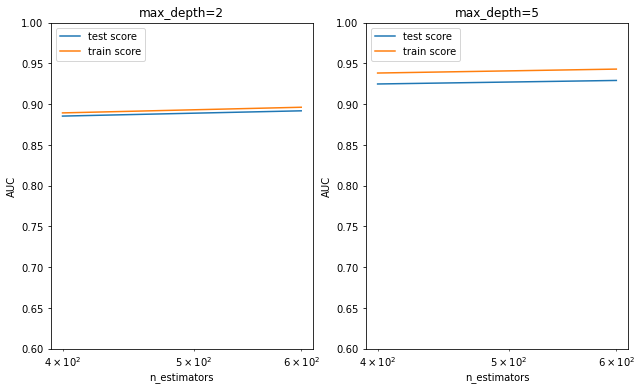

In [144]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


Max depth=5 gives the best test and train score

In [145]:
# model performance on test data with chosen hyperparameters

tree = DecisionTreeClassifier(max_depth=5)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(base_estimator=tree, learning_rate=0.01, n_estimators=600, algorithm="SAMME")
ABC.fit(X_train_bal, y_train_bal)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.01, n_estimators=600)

In [146]:
# predict on test data
predictions = ABC.predict_proba(X_test_pca)
predictions[:10]

array([[0.36975951, 0.63024049],
       [0.58251519, 0.41748481],
       [0.63294633, 0.36705367],
       [0.67244426, 0.32755574],
       [0.62326304, 0.37673696],
       [0.50870629, 0.49129371],
       [0.69894784, 0.30105216],
       [0.718415  , 0.281585  ],
       [0.63099808, 0.36900192],
       [0.59016199, 0.40983801]])

In [153]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.8818095698960008

## Conclusion

#### Accuracy Scores of Interpretable and High Performance Models
__Logistic Regression Accuracy Score:__ 77.5%

__Gradient Boosting Accuracy Score:__ 88.35%

__Adaptive Boosting Accuracy Score:__ 88.18%

#### The model with Gradient Boosting is the best performer of all the three models

### Interpretable Model inferences

In [154]:
coefficients

,Coefficient
const,3.974386
loc_ic_mou_8,1.780419
loc_og_t2m_mou_8,0.987925
last_day_rch_amt_8,0.816906
total_rech_data_8,0.813185
spl_ic_mou_8,0.648740
onnet_mou_8,0.534084
std_ic_mou_8,0.495029
loc_ic_mou_7,0.470616
offnet_mou_8,0.298896


#### It is better to focus on the top three columns : loc_ic_mou_8, loc_og_t2m_mou_8 and last_day_rch_amt_8 
__Better to focus on these columns to avoid churning by the customers and shifting to the other networks__

__So we have to target the people with only incoming, only outgoing and last day recharge amount on 8th month__